In [140]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [141]:
irisdf=pd.read_csv("iris.csv")
print(irisdf.describe())

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


In [142]:
print(irisdf.shape[0])

152


In [143]:
diabdf=pd.read_csv("diabetes.csv")

In [144]:
print(diabdf.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [145]:
print(diabdf.shape[0])

768


In [146]:
irisdf=irisdf.dropna()
print(irisdf.shape[0])

150


In [147]:
diabdf=diabdf.dropna()

diabdf.rename(columns={'Outcome':'Yes/No'}, inplace=True)
print(diabdf.columns)
print(irisdf.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Yes/No'],
      dtype='object')
Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


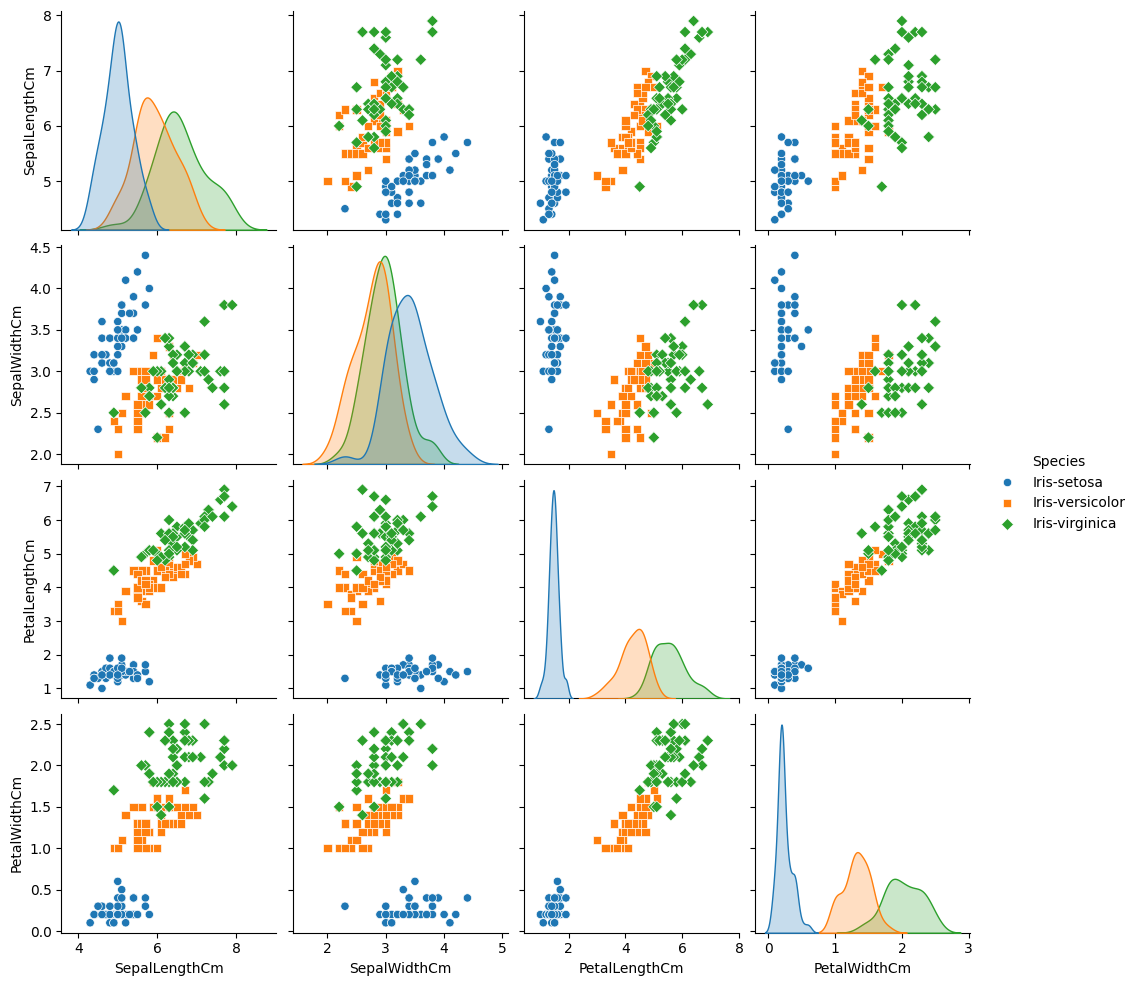

In [148]:
import seaborn as sn
irisdf=irisdf.drop(columns='Id')
sn.pairplot(irisdf, hue="Species", markers=["o", "s", "D"])
print(irisdf.columns)

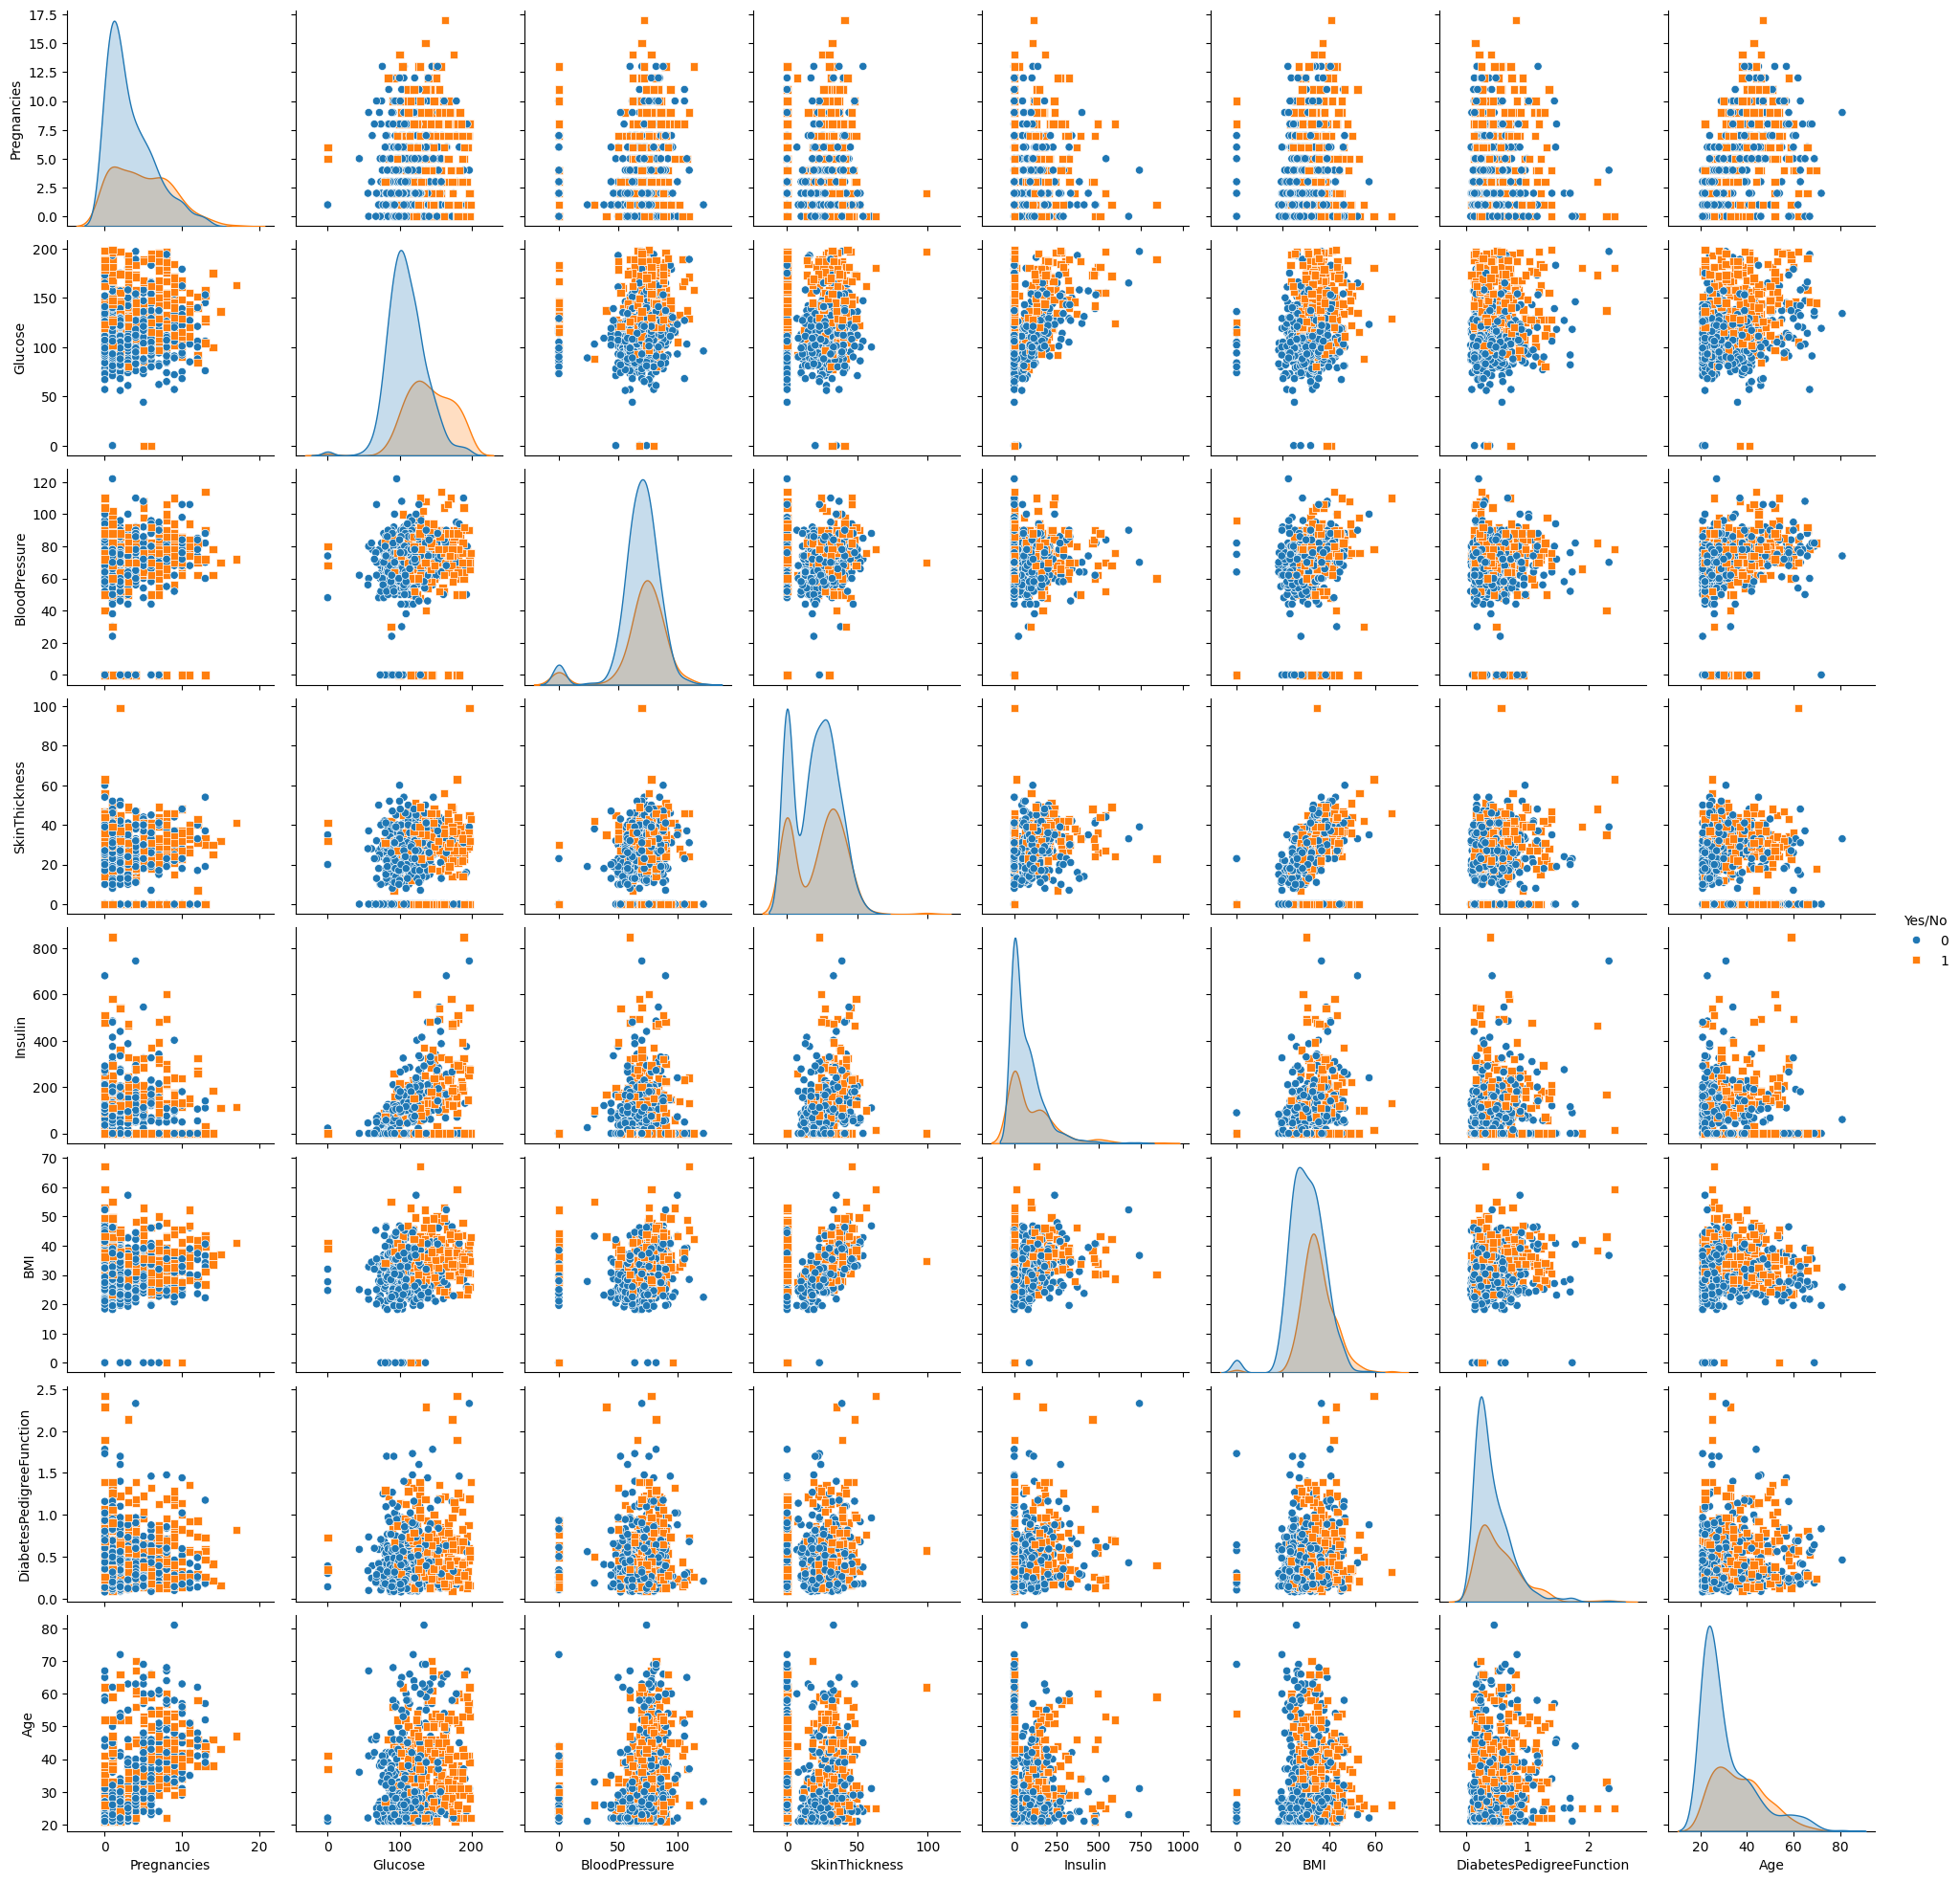

In [149]:
sn.pairplot(diabdf,hue='Yes/No', markers=["o", "s"])

In [150]:
iris_mean=irisdf.drop(columns='Species')
iris_mean=iris_mean.mean()
print(round(iris_mean,2))

SepalLengthCm    5.84
SepalWidthCm     3.05
PetalLengthCm    3.76
PetalWidthCm     1.20
dtype: float64


In [151]:
diab_mean=diabdf.drop(columns='Yes/No')
diab_mean=diab_mean.mean()
print(round(diab_mean,2))


Pregnancies                   3.85
Glucose                     120.89
BloodPressure                69.11
SkinThickness                20.54
Insulin                      79.80
BMI                          31.99
DiabetesPedigreeFunction      0.47
Age                          33.24
dtype: float64


In [152]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
diabdf['DiabetesPedigreeFunction']=scaler.fit_transform(diabdf[['DiabetesPedigreeFunction']])
print(diabdf)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Yes/No  
0                    0.234415   50       1  
1                    

In [153]:
def remove_outliers_boxplot(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_no_outliers

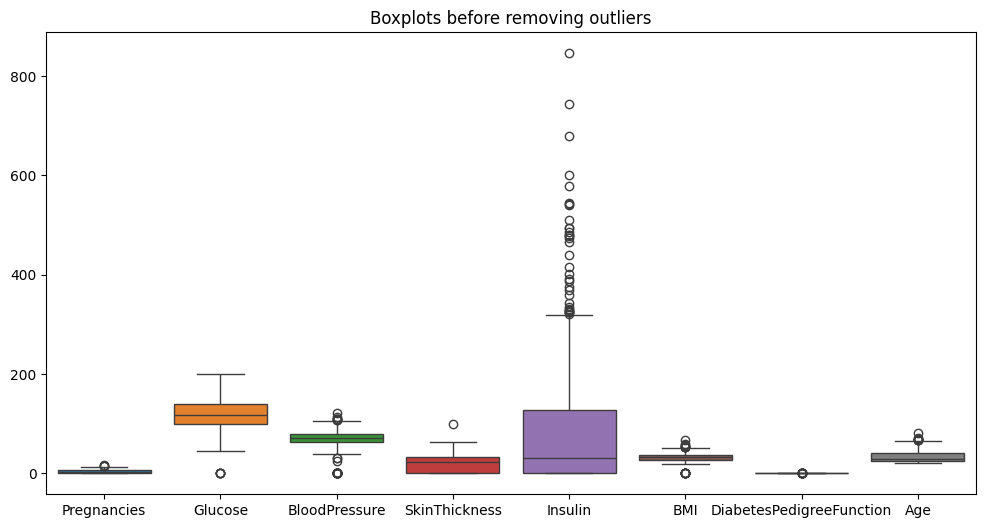

In [154]:
columns_to_remove_outliers = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
plt.figure(figsize=(12, 6))
sn.boxplot(data=diabdf[columns_to_remove_outliers])
plt.title('Boxplots before removing outliers')
plt.show()

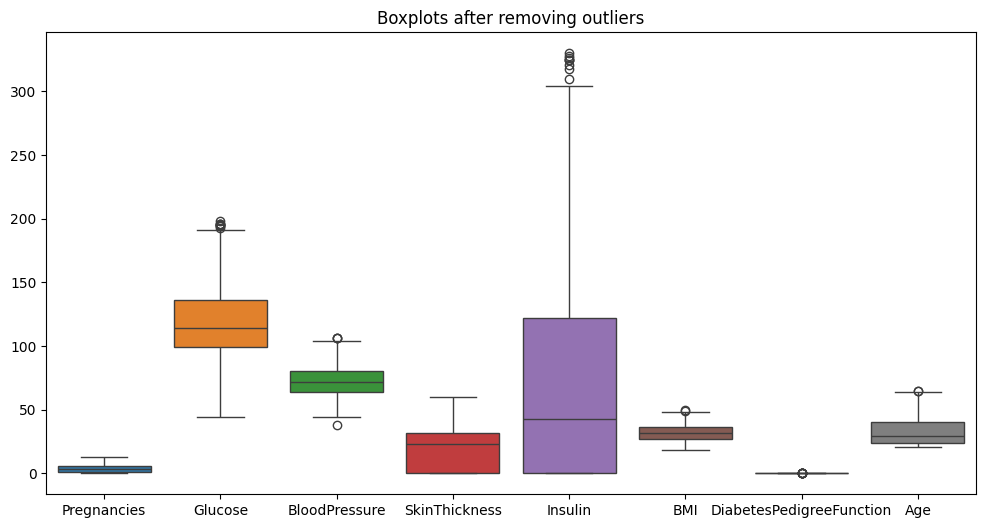

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
5              5      116             74              0        0  25.6   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Yes/No  
0                    0.234415   50       1  
1                    

In [155]:

for column in columns_to_remove_outliers:
    diabdf = remove_outliers_boxplot(diabdf, column)
plt.figure(figsize=(12, 6))
sn.boxplot(data=diabdf[columns_to_remove_outliers])
plt.title('Boxplots after removing outliers')
plt.show()
print(diabdf)

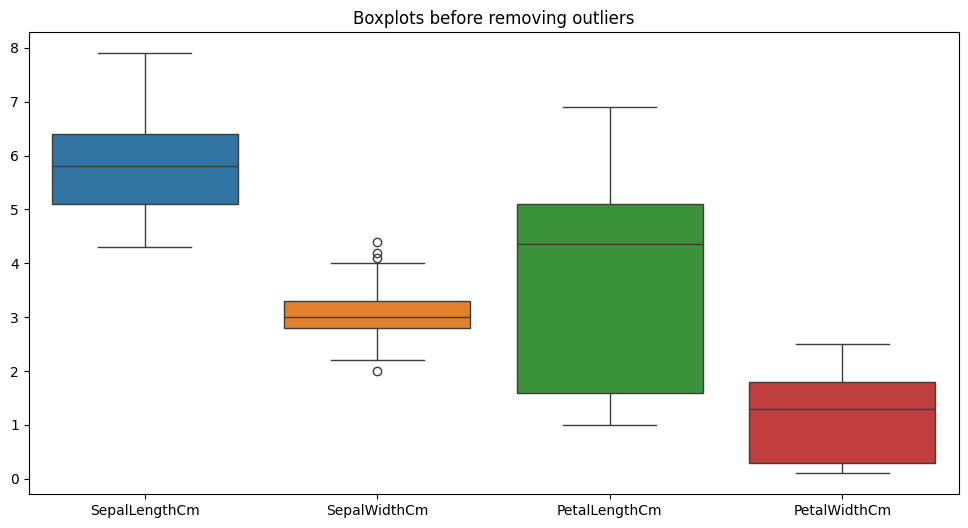

In [156]:
columns_to_remove_outliers_iris = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
plt.figure(figsize=(12, 6))
sn.boxplot(data=irisdf[columns_to_remove_outliers_iris])
plt.title('Boxplots before removing outliers')
plt.show()

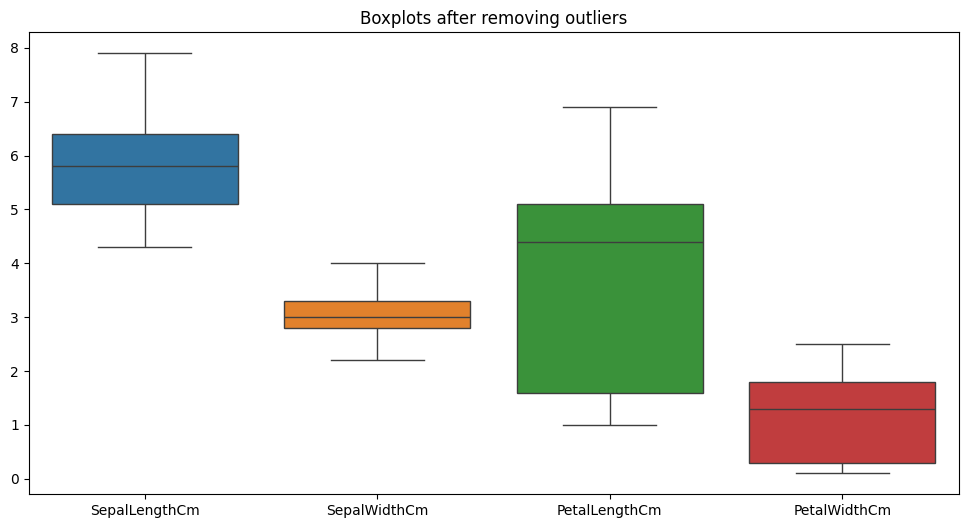

In [157]:
for column in columns_to_remove_outliers_iris:
    irisdf = remove_outliers_boxplot(irisdf, column)

# Plot boxplots after removing outliers
plt.figure(figsize=(12, 6))
sn.boxplot(data=irisdf[columns_to_remove_outliers_iris])
plt.title('Boxplots after removing outliers')
plt.show()